In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import nltk
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

# Loading the dataset

In [69]:
df=pd.read_csv('Twitter Sentiments.csv')

In [70]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [71]:
#datatype info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      31962 non-null  int64 
 1   label   31962 non-null  int64 
 2   tweet   31962 non-null  object
dtypes: int64(2), object(1)
memory usage: 749.2+ KB


# Preprocessing the dataset

In [72]:
#remove pattern in the input text
def remove_pattern(input_txt,pattern):
    r=re.findall(pattern,input_txt)
    for word in r:
        input_txt=re.sub(word," ",input_txt)
    return input_txt

In [73]:
df.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [74]:
#remove twitter handles(@user)
df['clean_tweet']=np.vectorize(remove_pattern)(df['tweet'],"@[\w]*")

In [75]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [76]:
#remove special characters,numbers and punctuations
df['clean_tweet']=df['clean_tweet'].str.replace("[^a-zA-Z#]"," ")

In [77]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [78]:
#remove short words
df['clean_tweet'].apply(lambda x:" ".join([w for w in x.split()if len(w)>3]))

0        when father dysfunctional selfish drags kids i...
1        thanks #lyft credit cause they offer wheelchai...
2                                      bihday your majesty
3                               #model love take with time
4                           factsguide society #motivation
                               ...                        
31957                                           that youuu
31958    nina turner airwaves trying wrap herself mantl...
31959                  listening songs monday morning work
31960      #sikh #temple vandalised #calgary #wso condemns
31961                                         thank follow
Name: clean_tweet, Length: 31962, dtype: object

In [79]:
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so se...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can t use cause ...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation,factsguide society now #motivation


In [80]:
#individual words considered as tokens
tokenized_tweet=df['clean_tweet'].apply(lambda x:x.split())
tokenized_tweet.head()

0    [when, a, father, is, dysfunctional, and, is, ...
1    [thanks, for, #lyft, credit, i, can, t, use, c...
2                              [bihday, your, majesty]
3    [#model, i, love, u, take, with, u, all, the, ...
4              [factsguide, society, now, #motivation]
Name: clean_tweet, dtype: object

In [81]:
#stem the words
from nltk.stem.porter import PorterStemmer
stemmer=PorterStemmer()

In [82]:
tokenized_tweet=tokenized_tweet.apply(lambda sentence:[stemmer.stem(word)for word in sentence])
tokenized_tweet.head()

0    [when, a, father, is, dysfunct, and, is, so, s...
1    [thank, for, #lyft, credit, i, can, t, use, ca...
2                              [bihday, your, majesti]
3    [#model, i, love, u, take, with, u, all, the, ...
4                    [factsguid, societi, now, #motiv]
Name: clean_tweet, dtype: object

In [83]:
#combine words into single sentence 
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i]=" ".join(tokenized_tweet[i])
df['clean_tweet']=tokenized_tweet
df.head()

,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunct and is so selfish he...
1,2,0,@user @user thanks for #lyft credit i can't us...,thank for #lyft credit i can t use caus they d...
2,3,0,bihday your majesty,bihday your majesti
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur
4,5,0,factsguide: society now #motivation,factsguid societi now #motiv


# Exploratory data analysis

In [84]:
#!pip install wordcloud

In [85]:
#visualize the frequent words
all_words=" ".join([sentence for sentence in df['clean_tweet']])
from wordcloud import WordCloud
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

<function matplotlib.pyplot.show(close=None, block=None)>

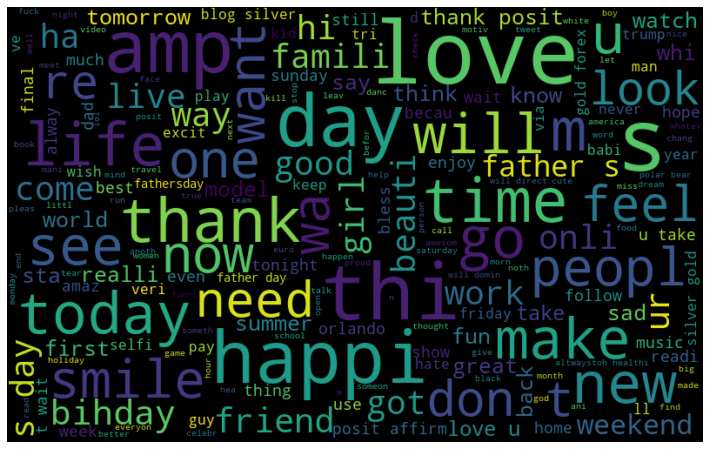

In [86]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

In [87]:
#frequent words visualization for positive
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==0]])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

<function matplotlib.pyplot.show(close=None, block=None)>

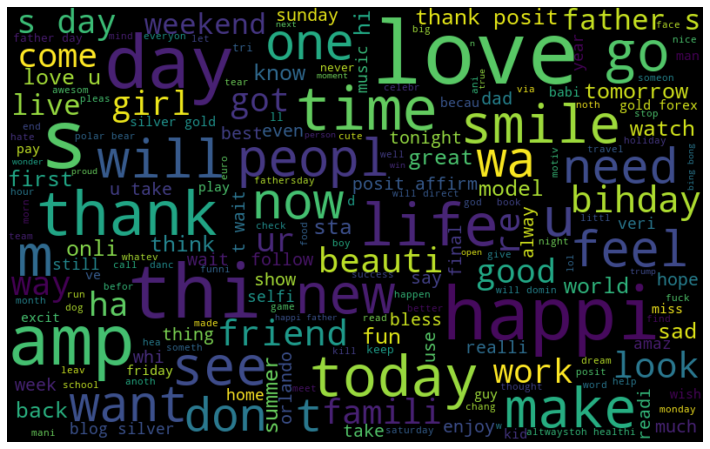

In [88]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

In [89]:
#frequent words visualization for positive
all_words=" ".join([sentence for sentence in df['clean_tweet'][df['label']==1]])
wordcloud=WordCloud(width=800,height=500,random_state=42,max_font_size=100).generate(all_words)

<function matplotlib.pyplot.show(close=None, block=None)>

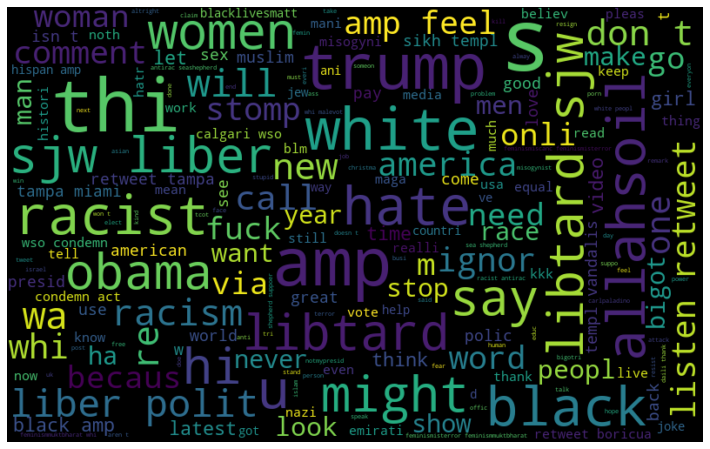

In [90]:
#plot the graph
plt.figure(figsize=(15,8))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show

In [91]:
#extract the hashtag
def hashtag_extract(tweets):
    hashtags=[]
    #loop words in the tweet
    for tweet in tweets:
        ht=re.findall(r"#(\w+)",tweet)
        hashtags.append(ht)
    return hashtags

In [92]:
#extract hashtags from positive tweets
ht_positive=hashtag_extract(df['clean_tweet'][df['label']==0])
#extract hashtags from negative tweets
ht_negative=hashtag_extract(df['clean_tweet'][df['label']==1])

In [93]:
ht_positive[:5]

[['run'], ['lyft', 'disapoint', 'getthank'], [], ['model'], ['motiv']]

In [94]:
#unnest list
ht_positive=sum(ht_positive,[])
ht_negative=sum(ht_negative,[])

In [95]:
ht_positive[:5]

['run', 'lyft', 'disapoint', 'getthank', 'model']

In [96]:
freq=nltk.FreqDist(ht_positive)
d=pd.DataFrame({'Hashtag':list(freq.keys()),'count':list(freq.values())})

In [97]:
d.head()

,Hashtag,count
0,run,72
1,lyft,2
2,disapoint,1
3,getthank,2
4,model,375


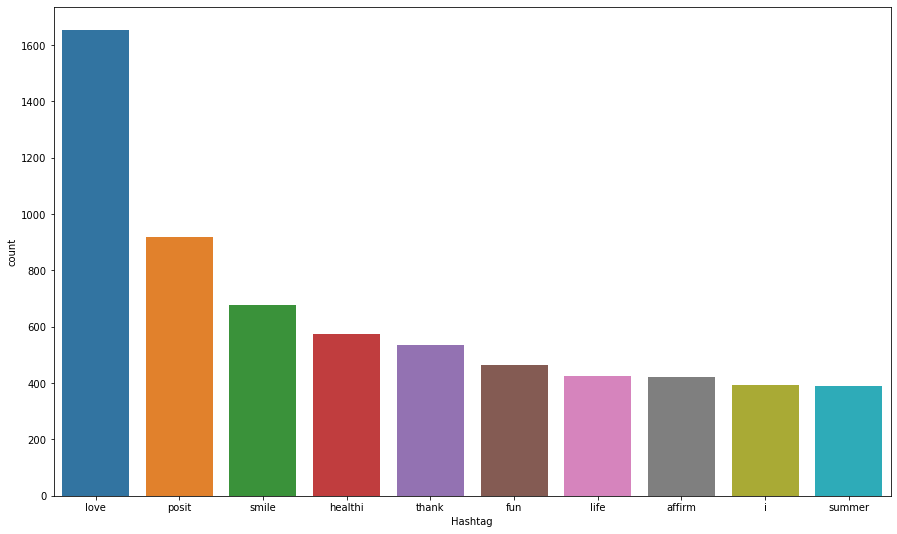

In [101]:
#select top 10 hashtags
d=d.nlargest(columns='count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='count')
plt.show()

In [102]:
freq=nltk.FreqDist(ht_negative)
d=pd.DataFrame({'Hashtag':list(freq.keys()),'count':list(freq.values())})

In [103]:
d.head()

,Hashtag,count
0,cnn,10
1,michigan,2
2,tcot,14
3,australia,6
4,opkillingbay,5


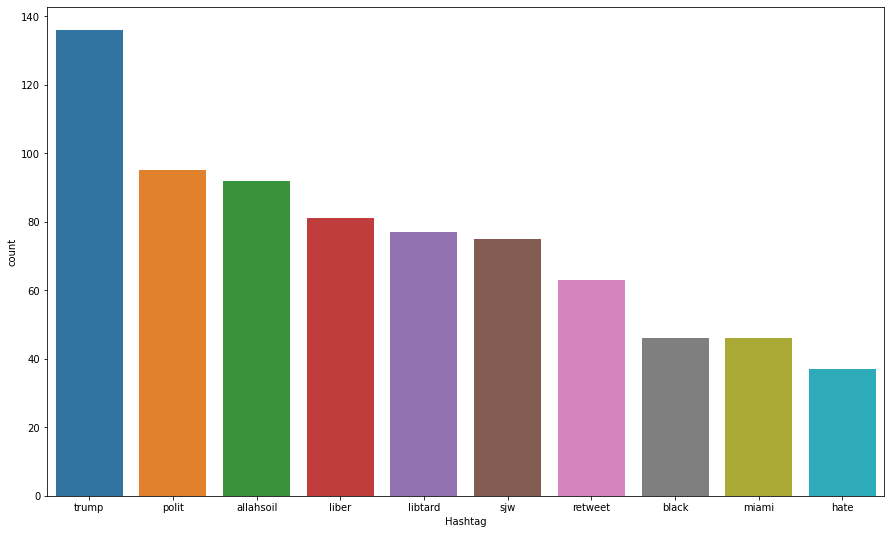

In [104]:
#select top 10 hashtags
d=d.nlargest(columns='count',n=10)
plt.figure(figsize=(15,9))
sns.barplot(data=d,x='Hashtag',y='count')
plt.show()

# Input split

In [109]:
#feature extraction
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer=CountVectorizer(max_df=0.90,min_df=2,max_features=1000,stop_words='english')
bow=bow_vectorizer.fit_transform(df['clean_tweet'])

In [110]:
bow

<31962x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 143044 stored elements in Compressed Sparse Row format>

In [111]:
bow[0]

<1x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [112]:
bow[0].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [113]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(bow,df['label'],random_state=42,test_size=0.25)

# Model training

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

In [120]:
#training
model=LogisticRegression()
model.fit(x_train,y_train)
#testing
pred=model.predict(x_test)
f1_score(y_test,pred)

0.5005875440658049

In [121]:
accuracy_score(y_test,pred)

0.9468151670629458

In [122]:
#use probability to get output
pred_prob=model.predict_proba(x_test)
pred=pred_prob[:,1]>0.3
pred=pred.astype(np.int)
f1_score(y_test,pred)

0.5635148042024833

In [123]:
accuracy_score(y_test,pred)

0.9428106619947441

In [130]:
pred_prob[0]

array([9.99915966e-01, 8.40339679e-05])

In [131]:
pred_prob[0][1]

8.403396790872339e-05

In [132]:
pred_prob[0][1]>=0.3

False